## Installing Libraries

In [ ]:
from scipy.io import arff
import pandas as pd

## Data Preprocessing

We filter out the following possible error cases :

- Extra tabs (\t)
- Extra spaces at ends of tokens in each row
- Extra commas

In [ ]:
from google.colab import files
files.upload()

Saving chronic_kidney_disease_full.arff to chronic_kidney_disease_full (1).arff


{'chronic_kidney_disease_full (1).arff': b'% 1. Title: Early stage of Indians Chronic Kidney Disease(CKD)\r\n%\r\n% 2. Source Information:\r\n%   (a) Source: \r\n%\t\t\tDr.P.Soundarapandian.M.D.,D.M\r\n%\t\t     (Senior Consultant Nephrologist), \r\n%\t\t\tApollo  Hospitals, \r\n%\t\t\tManagiri,\r\n%\t\t\tMadurai Main Road, \r\n%\t\t\tKaraikudi,\r\n%\t\t\tTamilnadu,\r\n%\t\t\tIndia.\r\n%   (b) Creator: \r\n%\t\t\tL.Jerlin Rubini(Research Scholar)\r\n%\t\t\tAlagappa University\r\n%\t\t\tEmailId   :jel.jerlin@gmail.com\r\n%\t\t\tContactNo :+91-9597231281\r\n%   (c) Guided by: \r\n%\t\t\tDr.P.Eswaran Assistant Professor,\r\n%\t\t\tDepartment of Computer Science and Engineering,\r\n%\t\t\tAlagappa University,\r\n%\t\t\tKaraikudi,\r\n%\t\t\tTamilnadu,\r\n%\t\t\tIndia.\r\n%\t\t\tEmailid:eswaranperumal@gmail.com\r\n%   (d) Date     : july 2015\r\n%\r\n% 3.Relevant Information:\r\n%\t\t\tage\t\t-\tage\t\r\n%\t\t\tbp\t\t-\tblood pressure\r\n%\t\t\tsg\t\t-\tspecific gravity\r\n%\t\t\tal\t\t-   \

First, we perform basic data pre-processing like removal of extra tabs and spaces from file lines for easier data loading.

In [ ]:
data = []
with open('chronic_kidney_disease_full.arff', "r") as f:
    flag = 0
    for line in f:
        if len(line) != 1 and flag == 1:
          line = line.replace('\t', '')    # remove extra tabs
          line = line.replace('\n', '')
          tokens = line.split(',')
          tokens = [token.strip() for token in tokens if len(token)>=1]   # remove spaces
          line = ','.join(tokens) + '\n'
        if '@data' in line:
          flag = 1
        data.append(line)

with open('chronic_kidney_disease_new.arff', "w") as f:
  for line in data:
    f.write(line)

In [ ]:
data = arff.loadarff('chronic_kidney_disease_new.arff')

In [ ]:
# Since data is of format (np.ndarray, metadata), use data[0]
df = pd.DataFrame(data[0])
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,b'1.020',b'1',b'0',b'?',b'normal',b'notpresent',b'notpresent',121.0,...,44.0,7800.0,5.2,b'yes',b'yes',b'no',b'good',b'no',b'no',b'ckd'
1,7.0,50.0,b'1.020',b'4',b'0',b'?',b'normal',b'notpresent',b'notpresent',NaN,...,38.0,6000.0,NaN,b'no',b'no',b'no',b'good',b'no',b'no',b'ckd'
2,62.0,80.0,b'1.010',b'2',b'3',b'normal',b'normal',b'notpresent',b'notpresent',423.0,...,31.0,7500.0,NaN,b'no',b'yes',b'no',b'poor',b'no',b'yes',b'ckd'
3,48.0,70.0,b'1.005',b'4',b'0',b'normal',b'abnormal',b'present',b'notpresent',117.0,...,32.0,6700.0,3.9,b'yes',b'no',b'no',b'poor',b'yes',b'yes',b'ckd'
4,51.0,80.0,b'1.010',b'2',b'0',b'normal',b'normal',b'notpresent',b'notpresent',106.0,...,35.0,7300.0,4.6,b'no',b'no',b'no',b'good',b'no',b'no',b'ckd'


Rename the column names to something meaningful :

In [ ]:
col={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"hemoglobin",
          "pcv":"packed_cell_volume",
          "wbcc":"white_blood_cell_count",
          "rbcc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

df.rename(columns=col, inplace=True)
df.head(5)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,b'1.020',b'1',b'0',b'?',b'normal',b'notpresent',b'notpresent',121.0,...,44.0,7800.0,5.2,b'yes',b'yes',b'no',b'good',b'no',b'no',b'ckd'
1,7.0,50.0,b'1.020',b'4',b'0',b'?',b'normal',b'notpresent',b'notpresent',NaN,...,38.0,6000.0,NaN,b'no',b'no',b'no',b'good',b'no',b'no',b'ckd'
2,62.0,80.0,b'1.010',b'2',b'3',b'normal',b'normal',b'notpresent',b'notpresent',423.0,...,31.0,7500.0,NaN,b'no',b'yes',b'no',b'poor',b'no',b'yes',b'ckd'
3,48.0,70.0,b'1.005',b'4',b'0',b'normal',b'abnormal',b'present',b'notpresent',117.0,...,32.0,6700.0,3.9,b'yes',b'no',b'no',b'poor',b'yes',b'yes',b'ckd'
4,51.0,80.0,b'1.010',b'2',b'0',b'normal',b'normal',b'notpresent',b'notpresent',106.0,...,35.0,7300.0,4.6,b'no',b'no',b'no',b'good',b'no',b'no',b'ckd'


The 'b' character at the start of each categorical variable entry is because these elements are byte strings encoded in `utf-8`. To convert byte strings into normal strings, use `decode('utf-8')`.

In [ ]:
for col in df.columns:
  if df[col].dtypes == object:
    df[col] = df[col].str.decode('utf-8')  # decode bytestrings to normal strings
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1,0,?,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4,0,?,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2,3,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2,0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


Now, since the `?` character refers to `NaN` values in the dataset, replace it with `np.nan`.

In [ ]:
import numpy as np
df.replace('?', np.nan, inplace = True)
df.head(5)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1,0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2,3,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2,0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    object 
 3   albumin                  354 non-null    object 
 4   sugar                    351 non-null    object 
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [ ]:
# separate df based on numerical and categorical attributes
df_num = df.select_dtypes(exclude=[object])
df_cat = df.select_dtypes(include=[object])

In [ ]:
df_num

,age,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
0,48.0,80.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2
1,7.0,50.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN
2,62.0,80.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN
3,48.0,70.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,42.0,70.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,12.0,80.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,17.0,60.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


In [ ]:
df_cat

,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,1.020,1,0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,1.020,4,0,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,1.010,2,3,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,1.005,4,0,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,1.010,2,0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.020,0,0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,1.025,0,0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,1.020,0,0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,1.025,0,0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


# Computing Statistics

Before we replace NaN values in each column, we compute the mode for each numerical attribute.

In [ ]:
# function to compute mode
def compute_mode(df: pd.DataFrame, col_name: str):
  col = df[col_name]
  mode = col.mode().values[0]
  return mode

In [ ]:
for col_name in df_num.columns:
  print(col_name, compute_mode(df_num, col_name))

age 60.0
blood_pressure 80.0
blood_glucose_random 99.0
blood_urea 46.0
serum_creatinine 1.2
sodium 135.0
potassium 3.5
hemoglobin 15.0
packed_cell_volume 41.0
white_blood_cell_count 9800.0
red_blood_cell_count 5.2


Next, we compute the following metrics for each numerical attribute:

- Inter-Quartile Range (IQR)
- Skew
- Kurtosis

In [ ]:
from scipy.stats import skew, kurtosis

def compute_skew_kurtosis(df: pd.DataFrame | pd.Series, col_name: str = None, thr = 1.5):
  if col_name is None:
    col = df
  else:
    col = df[col_name]

  Q1 = col.quantile(0.25)
  Q3 = col.quantile(0.75)

  col = col.replace(np.nan, col.median())
  col = np.array(col.tolist())
  sk = skew(col, axis=0, bias=True)
  kurt = kurtosis(col, axis=0, bias=True)
  print("Skew :", sk)
  print("Kurtosis :", kurt)

  IQR = Q3 - Q1
  lb = Q1 - thr * IQR
  ub = Q3 + thr * IQR

  print("\tMin\tLB\tQ1\tQ3\tUB\tIQR\tMax")
  print(f"Range : {col.min(), lb, Q1, Q3, ub, IQR, col.max()}")
  print()

for col_name in df_num:
  print("Attribute :", col_name)
  compute_skew_kurtosis(df_num, col_name)

Attribute : age
Skew : -0.6861504721723363
Kurtosis : 0.11864637248709542
	Min	LB	Q1	Q3	UB	IQR	Max
Range : (2.0, 8.25, 42.0, 64.5, 98.25, 22.5, 90.0)

Attribute : blood_pressure
Skew : 1.5958445599269697
Kurtosis : 8.778088801057761
	Min	LB	Q1	Q3	UB	IQR	Max
Range : (50.0, 55.0, 70.0, 80.0, 95.0, 10.0, 180.0)

Attribute : blood_glucose_random
Skew : 2.1958686902383873
Kurtosis : 5.171099607425509
	Min	LB	Q1	Q3	UB	IQR	Max
Range : (22.0, 3.0, 99.0, 163.0, 259.0, 64.0, 490.0)

Attribute : blood_urea
Skew : 2.7139116571757063
Kurtosis : 9.863386803312382
	Min	LB	Q1	Q3	UB	IQR	Max
Range : (1.5, -31.5, 27.0, 66.0, 124.5, 39.0, 391.0)

Attribute : serum_creatinine
Skew : 7.63683412719717
Kurtosis : 81.58740476448533
	Min	LB	Q1	Q3	UB	IQR	Max
Range : (0.4, -1.9499999999999997, 0.9, 2.8, 5.6499999999999995, 1.9, 76.0)

Attribute : sodium
Skew : -7.899569547306364
Kurtosis : 108.63211031726526
	Min	LB	Q1	Q3	UB	IQR	Max
Range : (4.5, 124.5, 135.0, 142.0, 152.5, 7.0, 163.0)

Attribute : potassium
Skew

Many variables in the dataset seem to be heavily skewed. A plot analysis of the above shows :

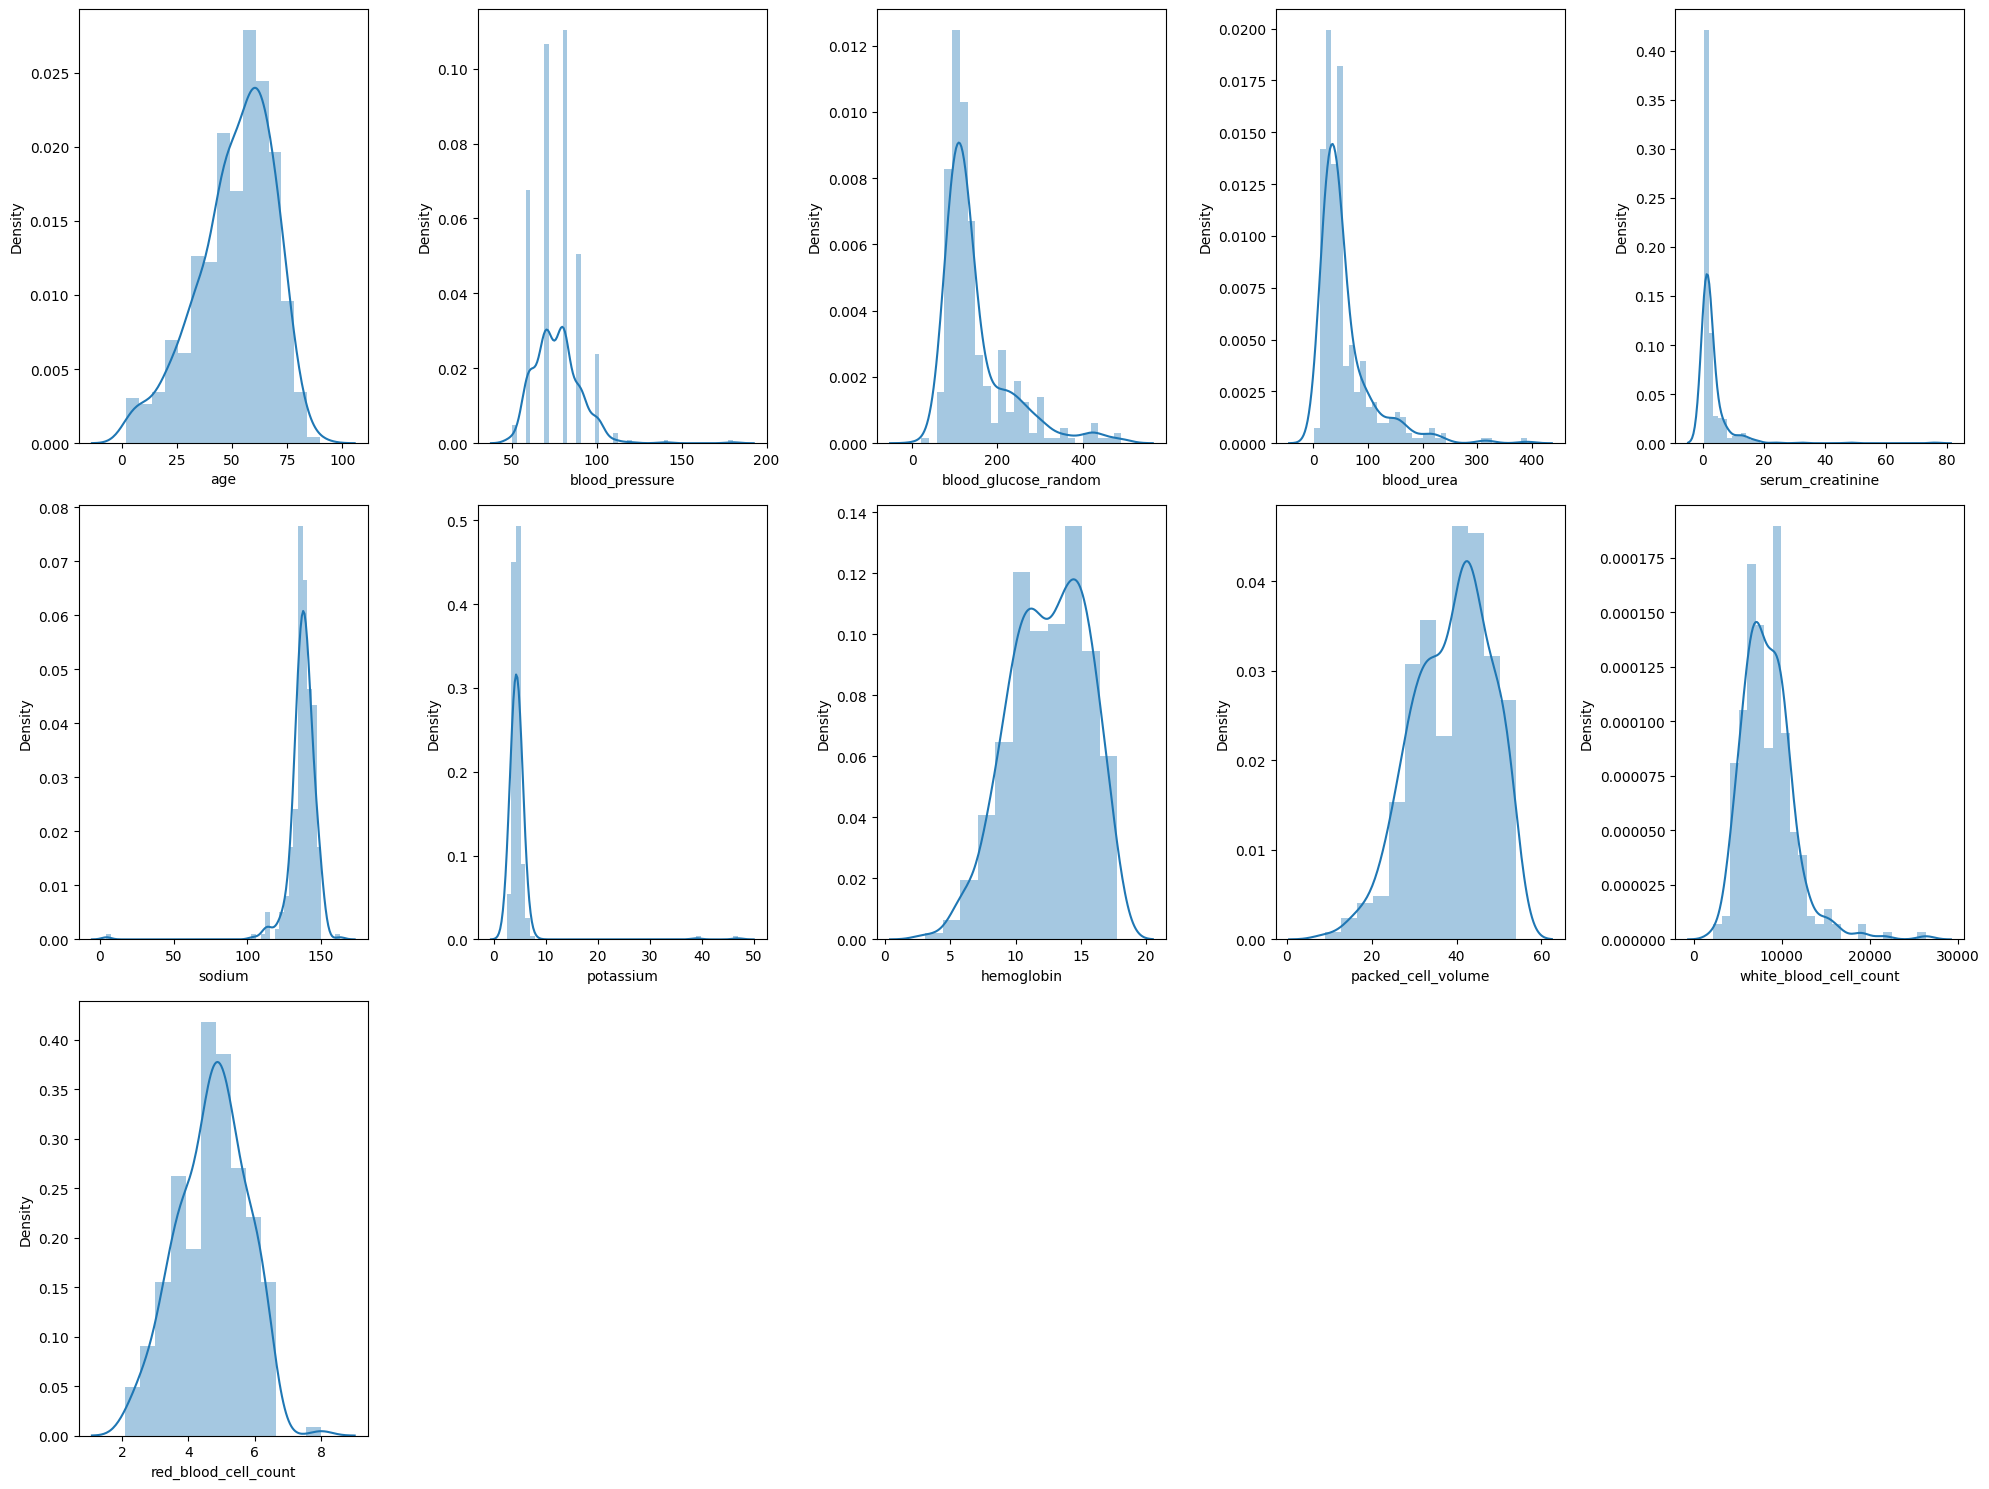

In [ ]:
# checking numerical features distribution
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt.figure(figsize = (20, 15))
plotnumber = 1

num_cols = df_num.columns

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

Most of the numerical attributes seem to have a skewed distribution. This might be due to certain patient categories not being adequately represented.


For example,

  The proportion of **Children** might be very small in the dataset. They might also have a higher number of incomplete attribute values compared to middle-aged or senior citizens, due to the following factors:

  - `Higher overall fitness`: This reduces the need for tests altogether.
  - `Hesitation`: Parents might be hesitant to put their children through multiple tests unless necessary.

An analysis of the previous arguments shows:

In [ ]:
df_child = df[df['age'] <= 18.0]
df_adult = df[df['age'] > 18.0]
print(f"Percentage of children : {len(df_child)/len(df)*100.0}%")
df_child.describe()

Percentage of children : 4.75%


,age,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
count,19.000000,13.000000,11.000000,18.000000,18.000000,12.000000,12.000000,17.000000,15.000000,14.000000,6.000000
mean,9.789474,63.076923,95.454545,29.694444,1.372222,138.083333,4.025000,12.611765,40.800000,9171.428571,5.083333
std,5.039609,11.094004,39.682146,18.578244,1.576596,3.117643,0.625409,2.195132,7.113368,3101.966764,0.722265
min,2.000000,50.000000,22.000000,1.500000,0.600000,135.000000,2.800000,8.100000,30.000000,6000.000000,3.800000
25%,5.500000,60.000000,83.000000,17.000000,0.700000,135.750000,3.750000,11.300000,35.000000,6775.000000,4.900000
50%,8.000000,60.000000,93.000000,24.000000,0.850000,137.500000,4.100000,12.200000,40.000000,8150.000000,5.300000
75%,14.500000,70.000000,99.500000,42.500000,1.000000,138.750000,4.400000,14.200000,47.000000,10975.000000,5.400000
max,17.000000,80.000000,192.000000,67.000000,7.300000,145.000000,4.900000,16.700000,52.000000,16700.000000,5.900000


## Visualization

In [ ]:
import plotly.express as px

def violin(col):
    fig = px.violin(df, y=col, x="class", color="class", box=True, template = 'plotly_dark')
    return fig.show()

In [ ]:
violin('blood_pressure')

In [ ]:
violin('specific_gravity')

## Removing NaN values

In light of the above arguments, we replace the NaN values with the column `median` since it is more robust to outliers.

In [ ]:
for col_name in df_num:
  col = df_num[col_name]
  median = col.median()
  df[col_name].replace(np.nan, median, inplace=True)

In [ ]:
num_cols = df_num.columns
df[num_cols].isnull().sum()

,0
age,0
blood_pressure,0
blood_glucose_random,0
blood_urea,0
serum_creatinine,0
sodium,0
potassium,0
hemoglobin,0
packed_cell_volume,0
white_blood_cell_count,0


For categorical values, simply replace with the `mode` :

In [ ]:
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [ ]:
for col in df_cat.columns:
    impute_mode(col)

In [ ]:
df[df_cat.columns].isnull().sum()

,0
specific_gravity,0
albumin,0
sugar,0
red_blood_cells,0
pus_cell,0
pus_cell_clumps,0
bacteria,0
hypertension,0
diabetes_mellitus,0
coronary_artery_disease,0


## Label Encoding

Once the NaN values are handled, label-encode the categorical values:

In [ ]:
from sklearn.preprocessing import LabelEncoder

lenc = LabelEncoder()

for col in df_cat.columns:
    df[col] = lenc.fit_transform(df[col])

In [ ]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,3,1,0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,3,4,0,1,1,0,0,121.0,...,38.0,6000.0,4.8,0,0,0,0,0,0,0
2,62.0,80.0,1,2,3,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,1,0,1,0,1,0
3,48.0,70.0,0,4,0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1,2,0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


## Modeling

First, split the dataset into inputs and labels :

In [ ]:
reqd_cols = [col for col in df.columns if col != 'class']

X = df[reqd_cols]
y = df['class']

Then, divide the data into a `70:30` train:test split

In [ ]:
from sklearn.model_selection import train_test_split

test_set_ratio = 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_set_ratio, random_state = 0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc = DecisionTreeClassifier()

In [ ]:
# hyper parameter tuning of decision tree

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
# best parameters and best scores
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 7, 'splitter': 'best'}
0.9800000000000001


In [ ]:
dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.985
Test Accuracy of Decision Tree Classifier is 0.96 

Confusion Matrix :- 
[[122   5]
 [  3  70]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       127
           1       0.93      0.96      0.95        73

    accuracy                           0.96       200
   macro avg       0.95      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test))}")

Training Accuracy of Ada Boost Classifier is 1.0
Test Accuracy of Ada Boost Classifier is 0.995 

Confusion Matrix :- 
[[126   1]
 [  0  73]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       127
           1       0.99      1.00      0.99        73

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.99 

Confusion Matrix :- 
[[126   1]
 [  1  72]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       127
           1       0.99      0.99      0.99        73

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")

print(f"{confusion_matrix(y_test, lgbm.predict(X_test))}\n")
print(classification_report(y_test, lgbm.predict(X_test)))

[LightGBM] [Info] Number of positive: 77, number of negative: 123
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 402
[LightGBM] [Info] Number of data points in the train set: 200, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.385000 -> initscore=-0.468379
[LightGBM] [Info] Start training from score -0.468379
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
